# Concise Implementation of Recurrent Neural Networks

In [1]:
import d2l
import math
from mxnet import gluon, init, np, npx
from mxnet.gluon import nn, rnn
npx.set_np()

batch_size, num_steps = 32, 35
train_iter, vocab = d2l.load_data_time_machine(batch_size, num_steps)

Creating a RNN layer with 256 hidden units.

In [2]:
rnn_layer = rnn.RNN(256)
rnn_layer.initialize()

Initializing the hidden state.

In [3]:
state = rnn_layer.begin_state(batch_size=1)
len(state), state[0].shape

(1, (1, 1, 256))

Defining a class to wrap the RNN layers

In [4]:
class RNNModel(nn.Block):
    def __init__(self, rnn_layer, vocab_size, **kwargs):
        super(RNNModel, self).__init__(**kwargs)
        self.rnn = rnn_layer
        self.vocab_size = vocab_size
        self.dense = nn.Dense(vocab_size)

    def forward(self, inputs, state):
        X = npx.one_hot(inputs.T, self.vocab_size)
        Y, state = self.rnn(X, state)
        # The fully connected layer will first change the shape of Y to
        # (num_steps * batch_size, num_hiddens)
        # Its output shape is (num_steps * batch_size, vocab_size)
        output = self.dense(Y.reshape((-1, Y.shape[-1])))
        return output, state

    def begin_state(self, *args, **kwargs):
        return self.rnn.begin_state(*args, **kwargs)

Training

Perplexity 1.2, 158013 tokens/sec on gpu(0)
time traveller  you can show black is white by argument said fil
traveller after the pauserequired for the little go the geo


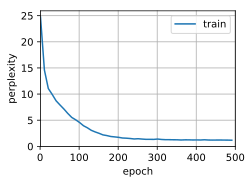

In [5]:
num_epochs, lr, ctx = 500, 1, d2l.try_gpu()
model = RNNModel(rnn_layer, len(vocab))
model.initialize(force_reinit=True, ctx=ctx)
d2l.train_ch8(model, train_iter, vocab, lr, num_epochs, ctx)